In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from plotly import graph_objects as go
import pandas as pd
from pandas import Series

In [2]:
#open the file
f = 'C:/Users/proto/Desktop/Cesa project/SingerSplit_sorted_20k.data'
data = []
with open(f, 'r') as temp:
    data = temp.readlines()

In [3]:
#every docID is a line
#for every line in our data
#find the position of the first space and add 1
#the line is now the line itself, starting from after the space, so ID is removed
#find the poisition of the =
#if the position of the = is 0, there are no labels, save that line index in the junk
#labels are what's on the line, before the =
#replace the spaces between the labels with commas
#features are what's after the = to the end
#to remove the = we unite the labels with the features, with a space between
#substitute the line in the data with our new line
junk = []
for x in range(len(data)) :
    line = data[x]
    pospace = line.find(' ') + 1
    line = line[pospace:]
    posequal = line.find('=')
    if posequal == 0 :
        junk.append(x)
        continue
    labels = line[:posequal - 1]
    labels = labels.replace(' ', ',')
    features = line[posequal + 2:]
    line = labels + ' ' + features
    data[x] = line   

In [4]:
#pop the lines without labels, starting from the bottom, since starting from the top would move the labels as it computes, so delete the wrong lines
[data.pop(x) for x in sorted(junk, reverse = True)]

['doc020905 = 174:0.141600328967288 484:0.06827560802414 558:0.0992884957311049 763:0.0800406560207027 802:0.212646194032161 856:0.0560920592231635 987:0.0708237584513015 1156:0.101787571088315 1652:0.0685753193175214 1720:0.0447052175016882 2249:0.0563997520869268 2504:0.0717765657000031 2651:0.265404471707794 2999:0.0559050811061768 3253:0.0730100896337102 3321:0.147141895793547 3426:0.0241788931161245 3733:0.0431870697249518 4924:0.0853440930589787 4993:0.0751544781116452 5889:0.067306591099957 6390:0.060342021266572 6926:0.0142810426613332 6984:0.0810641794542984 8461:0.160728217053964 8509:0.162256827764113 8772:0.0585786747376566 9101:0.0485986132231042 9517:0.1286551194292 10835:0.0983465135607241 10927:0.0680453715918314 11193:0.0313551611267704 11412:0.083376234863635 11803:0.0253744672708233 13113:0.0389142371693982 13493:0.0425681959891175 13710:0.0865920149179674 14080:0.0586155719011992 14250:0.0535435739889681 14914:0.0677507083821267 14919:0.117181427164996 14948:0.09342

In [5]:
#save the new dataset in a new file
with open('C:/Users/proto/Desktop/Cesa project/cleandata','w') as temp :
    temp.writelines(data)

In [5]:
#load the new file with a sparse matrix
X, y = load_svmlight_file('C:/Users/proto/Desktop/Cesa project/cleandata', multilabel = True)

In [12]:
X

<19860x95280 sparse matrix of type '<class 'numpy.float64'>'
	with 1858673 stored elements in Compressed Sparse Row format>

In [13]:
y

[(34.0, 59.0, 92.0, 93.0, 101.0),
 (21.0, 33.0),
 (4.0, 5.0, 33.0, 51.0, 59.0, 70.0, 79.0),
 (4.0, 5.0, 33.0),
 (0.0, 19.0, 33.0),
 (97.0, 101.0),
 (92.0, 93.0, 94.0, 96.0, 97.0, 101.0),
 (19.0, 33.0),
 (40.0, 59.0),
 (1.0, 33.0, 70.0, 71.0),
 (2.0, 22.0, 32.0, 33.0, 51.0, 59.0, 70.0, 79.0),
 (92.0, 101.0),
 (35.0, 59.0, 94.0, 95.0, 101.0),
 (1.0, 33.0, 70.0, 71.0),
 (92.0, 101.0),
 (92.0, 101.0),
 (14.0, 15.0, 33.0),
 (70.0, 82.0),
 (2.0, 32.0, 33.0, 40.0, 51.0, 59.0, 70.0, 79.0, 82.0),
 (1.0, 33.0, 70.0, 71.0),
 (1.0, 33.0, 70.0, 71.0),
 (97.0, 100.0, 101.0),
 (35.0, 59.0),
 (53.0, 55.0, 59.0, 60.0, 68.0, 70.0),
 (70.0, 73.0),
 (1.0, 33.0, 70.0, 71.0),
 (70.0, 82.0, 89.0),
 (32.0, 33.0, 51.0, 59.0, 70.0, 79.0),
 (92.0, 101.0),
 (4.0, 7.0, 33.0),
 (4.0, 5.0, 33.0),
 (0.0, 19.0, 33.0),
 (19.0, 33.0),
 (92.0, 101.0),
 (18.0, 22.0, 33.0),
 (0.0, 33.0),
 (97.0, 99.0, 101.0),
 (26.0, 33.0),
 (35.0, 36.0, 37.0, 38.0, 40.0, 42.0, 59.0),
 (37.0, 38.0, 59.0),
 (4.0, 5.0, 33.0),
 (4.0, 5.0, 33.

In [24]:
#counts the absolute frequency of each label in the dataset and outputs a dictionary
labcount = {}
for x in y:
    for k in x:
        if k in labcount : 
            labcount[k] += 1
        else :
            labcount[k] = 1

In [25]:
labcount = sorted(labcount.items(), key = lambda kv:(kv[0], kv[1]))

In [26]:
labcount

[(0.0, 585),
 (1.0, 328),
 (2.0, 796),
 (3.0, 136),
 (4.0, 3465),
 (5.0, 2059),
 (6.0, 344),
 (7.0, 1670),
 (8.0, 47),
 (9.0, 1000),
 (10.0, 373),
 (11.0, 240),
 (12.0, 66),
 (13.0, 228),
 (14.0, 1206),
 (15.0, 1042),
 (16.0, 124),
 (17.0, 173),
 (18.0, 686),
 (19.0, 173),
 (20.0, 57),
 (21.0, 784),
 (22.0, 902),
 (23.0, 140),
 (24.0, 165),
 (25.0, 37),
 (26.0, 35),
 (27.0, 399),
 (28.0, 28),
 (29.0, 97),
 (30.0, 264),
 (31.0, 242),
 (32.0, 287),
 (33.0, 8899),
 (34.0, 222),
 (35.0, 567),
 (36.0, 78),
 (37.0, 150),
 (38.0, 142),
 (39.0, 16),
 (40.0, 47),
 (41.0, 6),
 (42.0, 4),
 (43.0, 27),
 (44.0, 1149),
 (45.0, 349),
 (46.0, 803),
 (47.0, 49),
 (48.0, 31),
 (50.0, 3),
 (51.0, 367),
 (52.0, 28),
 (53.0, 496),
 (54.0, 77),
 (55.0, 341),
 (56.0, 45),
 (57.0, 13),
 (58.0, 143),
 (59.0, 2837),
 (60.0, 253),
 (61.0, 36),
 (62.0, 29),
 (63.0, 51),
 (64.0, 103),
 (65.0, 32),
 (67.0, 38),
 (68.0, 48),
 (69.0, 1),
 (70.0, 5634),
 (71.0, 967),
 (72.0, 213),
 (73.0, 835),
 (74.0, 243),
 (75.0, 8

In [28]:
len(labcount)

100

In [30]:
#sorts the labels by frequency
labcount = {}
for x in y:
    for k in x:
        if k in labcount : 
            labcount[k] += 1
        else :
            labcount[k] = 1
labcount = sorted(labcount.items(), key = lambda kv:(kv[0], kv[1]))

In [31]:
labcount

[(0.0, 585),
 (1.0, 328),
 (2.0, 796),
 (3.0, 136),
 (4.0, 3465),
 (5.0, 2059),
 (6.0, 344),
 (7.0, 1670),
 (8.0, 47),
 (9.0, 1000),
 (10.0, 373),
 (11.0, 240),
 (12.0, 66),
 (13.0, 228),
 (14.0, 1206),
 (15.0, 1042),
 (16.0, 124),
 (17.0, 173),
 (18.0, 686),
 (19.0, 173),
 (20.0, 57),
 (21.0, 784),
 (22.0, 902),
 (23.0, 140),
 (24.0, 165),
 (25.0, 37),
 (26.0, 35),
 (27.0, 399),
 (28.0, 28),
 (29.0, 97),
 (30.0, 264),
 (31.0, 242),
 (32.0, 287),
 (33.0, 8899),
 (34.0, 222),
 (35.0, 567),
 (36.0, 78),
 (37.0, 150),
 (38.0, 142),
 (39.0, 16),
 (40.0, 47),
 (41.0, 6),
 (42.0, 4),
 (43.0, 27),
 (44.0, 1149),
 (45.0, 349),
 (46.0, 803),
 (47.0, 49),
 (48.0, 31),
 (50.0, 3),
 (51.0, 367),
 (52.0, 28),
 (53.0, 496),
 (54.0, 77),
 (55.0, 341),
 (56.0, 45),
 (57.0, 13),
 (58.0, 143),
 (59.0, 2837),
 (60.0, 253),
 (61.0, 36),
 (62.0, 29),
 (63.0, 51),
 (64.0, 103),
 (65.0, 32),
 (67.0, 38),
 (68.0, 48),
 (69.0, 1),
 (70.0, 5634),
 (71.0, 967),
 (72.0, 213),
 (73.0, 835),
 (74.0, 243),
 (75.0, 8

In [15]:
sum = 0
for i in labcount :
    sum += i[1]
sum

61876

In [18]:
8899 / 61876

0.1438198978602366

In [19]:
5634 / 61876

0.09105307388971491

In [20]:
4874 / 61876

0.07877044411403453

In [21]:
3465 / 61876

0.05599909496412179

In [5]:
#take the last four labels
fourlabels = [x[0] for x in labcount[-4:]]
fourlabels

[4.0, 101.0, 70.0, 33.0]

In [6]:
#labels list with +1 if 4 appears as a label
l4 = []
for label in y :
    if fourlabels[0] in label :
        l4.append(+1)
    else :
        l4.append(-1)

In [7]:
#labels list with +1 if 101 appears as a label
l101 = []
for label in y :
    if fourlabels[1] in label :
        l101.append(+1)
    else :
        l101.append(-1)

In [8]:
#labels list with +1 if 70 appears as a label
l70 = []
for label in y :
    if fourlabels[2] in label :
        l70.append(+1)
    else :
        l70.append(-1)

In [9]:
#labels list with +1 if 33 appears as a label
l33 = []
for label in y :
    if fourlabels[3] in label :
        l33.append(+1)
    else :
        l33.append(-1)

In [10]:
from sklearn.base import BaseEstimator
class SVMPegasos(BaseEstimator):
    
    def __init__(self, n_iter = 10, lambda1 = 1) :
        self.n_iter = n_iter
        self.lambda1 = lambda1
        
    def fit(self, X, Y) :
        
        m, n_features = X.shape[0], X.shape[1]
        self.w = np.zeros(n_features)
        for t in range(1, self.n_iter + 1) :
            eta = 1 / (self.lambda1 * t)
            i = np.random.randint(0, m)
            x, y = X[i], Y[i]
            score = x.dot(self.w.T)
            if y * score < 1 :
                self.w = (1 - eta * self.lambda1) * self.w + (eta * y) * x
            else :
                self.w = (1 - eta * self.lambda1) * self.w
                
    def predict(self, X) :
                
        pred = X.dot(self.w.T)
        lab = []
        for x in pred :
            if x > 0 :
                lab.append(+ 1)
            else :
                lab.append(- 1)
        return lab
    
    def score(self, X, Y) :
        
        predlab = self.predict(X)
        return accuracy_score(Y, predlab)   

In [11]:
X.shape[0]

19860

In [57]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X, l4, test_size = 0.4, random_state = 42 , stratify = l4)

In [58]:
lambdas = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
scores4 = []
for i in range(1000, 19001, 1000) :
    for k in lambdas :
        svm = SVMPegasos(n_iter = i, lambda1 = k)
        scores4.append(i)
        scores4.append(k)
        svm.fit(X4_train, y4_train)
        trscore4 = svm.score(X4_train, y4_train)
        scores4.append(trscore4)
        tsscore4 = svm.score(X4_test, y4_test)
        scores4.append(tsscore4)
        cvscore4 = np.mean(cross_val_score(svm, X, l4, cv = 10))
        scores4.append(cvscore4)
print(scores4)   

[1000, 1, 0.8857838200738503, 0.881797583081571, 0.8662134944612288, 1000, 0.1, 0.8757972473984559, 0.8743705941591138, 0.8615307150050352, 1000, 0.01, 0.9011413225914736, 0.898036253776435, 0.886404833836858, 1000, 0.001, 0.93689157435381, 0.9340382678751259, 0.9398791540785499, 1000, 0.0001, 0.9314367237327963, 0.9272406847935549, 0.936908358509567, 1000, 1e-05, 0.9071836186639812, 0.8992950654582075, 0.9207955689828801, 2000, 1, 0.8740349110439745, 0.8702165156092648, 0.8681772406847935, 2000, 0.1, 0.8622020812353138, 0.8588872104733132, 0.8719033232628398, 2000, 0.01, 0.8918261161463579, 0.888595166163142, 0.8866062437059415, 2000, 0.001, 0.9468781470292045, 0.9436052366565961, 0.9414400805639478, 2000, 0.0001, 0.9520812353138637, 0.9447381671701913, 0.945669687814703, 2000, 1e-05, 0.9389895938234307, 0.9330312185297079, 0.9199899295065459, 3000, 1, 0.8700906344410876, 0.8646777442094663, 0.8686304128902316, 3000, 0.1, 0.8807485733467607, 0.874496475327291, 0.8721550855991944, 3000

In [12]:
scores4 = [1000, 1, 0.8857838200738503, 0.881797583081571, 0.8662134944612288, 1000, 0.1, 0.8757972473984559, 0.8743705941591138, 0.8615307150050352, 1000, 0.01, 0.9011413225914736, 0.898036253776435, 0.886404833836858, 1000, 0.001, 0.93689157435381, 0.9340382678751259, 0.9398791540785499, 1000, 0.0001, 0.9314367237327963, 0.9272406847935549, 0.936908358509567, 1000, 1e-05, 0.9071836186639812, 0.8992950654582075, 0.9207955689828801, 2000, 1, 0.8740349110439745, 0.8702165156092648, 0.8681772406847935, 2000, 0.1, 0.8622020812353138, 0.8588872104733132, 0.8719033232628398, 2000, 0.01, 0.8918261161463579, 0.888595166163142, 0.8866062437059415, 2000, 0.001, 0.9468781470292045, 0.9436052366565961, 0.9414400805639478, 2000, 0.0001, 0.9520812353138637, 0.9447381671701913, 0.945669687814703, 2000, 1e-05, 0.9389895938234307, 0.9330312185297079, 0.9199899295065459, 3000, 1, 0.8700906344410876, 0.8646777442094663, 0.8686304128902316, 3000, 0.1, 0.8807485733467607, 0.874496475327291, 0.8721550855991944, 3000, 0.01, 0.8879657603222558, 0.8831822759315207, 0.883031218529708, 3000, 0.001, 0.9508224236320914, 0.94662638469285, 0.9418932527693856, 3000, 0.0001, 0.9613964417589795, 0.9498992950654582, 0.9498489425981873, 3000, 1e-05, 0.9432695535414569, 0.9318982880161127, 0.9378147029204431, 4000, 1, 0.8657267539442766, 0.8626636455186304, 0.8745216515609264, 4000, 0.1, 0.8770560590802282, 0.87134944612286, 0.8679254783484392, 4000, 0.01, 0.8965256797583081, 0.8924974823766365, 0.885498489425982, 4000, 0.001, 0.9436052366565961, 0.9408358509566969, 0.9417421953675731, 4000, 0.0001, 0.9648371936891574, 0.9526686807653575, 0.9550855991943606, 4000, 1e-05, 0.9533400469956361, 0.9419687814702921, 0.9353977844914402, 5000, 1, 0.8727760993622021, 0.8689577039274925, 0.8694864048338369, 5000, 0.1, 0.8721886539107083, 0.8700906344410876, 0.8726586102719033, 5000, 0.01, 0.8920778784827124, 0.8872104733131924, 0.8847432024169184, 5000, 0.001, 0.9490600872776099, 0.9449899295065458, 0.9415911379657602, 5000, 0.0001, 0.9704598858677409, 0.9583333333333334, 0.956797583081571, 5000, 1e-05, 0.9556898288016112, 0.9410876132930514, 0.9448640483383686, 6000, 1, 0.8785666330983551, 0.8737411883182276, 0.8721047331319234, 6000, 0.1, 0.8811681772406847, 0.8777693856998993, 0.8691339375629406, 6000, 0.01, 0.887881839543471, 0.8826787512588117, 0.8819738167170191, 6000, 0.001, 0.9455354145686472, 0.9397029204431017, 0.9408358509566968, 6000, 0.0001, 0.9709634105404498, 0.9549345417925479, 0.9569989929506548, 6000, 1e-05, 0.9594662638469285, 0.9427240684793555, 0.9443605236656596, 7000, 1, 0.8712655253440752, 0.8683282980866063, 0.8695367573011076, 7000, 0.1, 0.8709298422289359, 0.8679506545820745, 0.8682275931520644, 7000, 0.01, 0.8875461564283317, 0.8830563947633434, 0.8832829808660625, 7000, 0.001, 0.9467103054716348, 0.9425981873111783, 0.9415911379657602, 7000, 0.0001, 0.9736488754615643, 0.9584592145015106, 0.9595669687814704, 7000, 1e-05, 0.9667673716012085, 0.953423967774421, 0.949496475327291, 8000, 1, 0.8795736824437731, 0.8742447129909365, 0.8731621349446123, 8000, 0.1, 0.8812520980194696, 0.8751258811681772, 0.8700402819738168, 8000, 0.01, 0.8865391070829137, 0.8821752265861027, 0.8817220543806646, 8000, 0.001, 0.9497314535078886, 0.9454934541792548, 0.9425478348439074, 8000, 0.0001, 0.9744880832494126, 0.9616062437059416, 0.9590634441087614, 8000, 1e-05, 0.9663477677072844, 0.9458710976837865, 0.9512084592145016, 9000, 1, 0.8846928499496476, 0.8790281973816717, 0.8683786505538771, 9000, 0.1, 0.8784827123195703, 0.8727341389728097, 0.869385699899295, 9000, 0.01, 0.8872104733131924, 0.8824269889224572, 0.8858509566968783, 9000, 0.001, 0.9494796911715341, 0.9448640483383686, 0.9416918429003023, 9000, 0.0001, 0.9745720040281974, 0.9618580060422961, 0.9591641490433032, 9000, 1e-05, 0.9719704598858677, 0.9546827794561934, 0.9512588116817724, 10000, 1, 0.8817556226921786, 0.8767623363544814, 0.8693353474320242, 10000, 0.1, 0.8736153071500503, 0.8685800604229608, 0.8695871097683787, 10000, 0.01, 0.8919939577039275, 0.8872104733131924, 0.8862034239677744, 10000, 0.001, 0.9457032561262169, 0.9422205438066465, 0.9415407854984895, 10000, 0.0001, 0.9765861027190332, 0.9619838872104733, 0.9594662638469286, 10000, 1e-05, 0.9707116482040953, 0.9509063444108762, 0.9515609264853978, 11000, 1, 0.8773078214165827, 0.8717270896273918, 0.8690332326283988, 11000, 0.1, 0.8788183954347096, 0.875, 0.8708459214501512, 11000, 0.01, 0.8896441758979523, 0.8841893252769386, 0.8839375629405841, 11000, 0.001, 0.9467942262504196, 0.9420946626384693, 0.941792547834844, 11000, 0.0001, 0.9740684793554885, 0.9573262839879154, 0.9615810674723063, 11000, 1e-05, 0.9765861027190332, 0.9545568982880162, 0.9543806646525681, 12000, 1, 0.8820913058073179, 0.8758811681772407, 0.8697885196374623, 12000, 0.1, 0.8755454850621014, 0.8705941591137966, 0.8684290030211482, 12000, 0.01, 0.8880496811010407, 0.8834340382678751, 0.8836858006042296, 12000, 0.001, 0.9472977509231285, 0.9419687814702921, 0.9431520644511581, 12000, 0.0001, 0.9793554884189325, 0.9609768378650554, 0.9603222557905339, 12000, 1e-05, 0.9760825780463243, 0.9561933534743202, 0.9533736153071501, 13000, 1, 0.8720208123531387, 0.8663141993957704, 0.8696374622356495, 13000, 0.1, 0.8705102383350117, 0.8668177240684793, 0.8708962739174219, 13000, 0.01, 0.8906512252433703, 0.8858257804632427, 0.884491440080564, 13000, 0.001, 0.9451997314535079, 0.9405840886203424, 0.9420946626384692, 13000, 0.0001, 0.9779288351795905, 0.9603474320241692, 0.9613796576032225, 13000, 1e-05, 0.9798590130916415, 0.9549345417925479, 0.955891238670695, 14000, 1, 0.8792379993286338, 0.8743705941591138, 0.8707955689828802, 14000, 0.1, 0.8763846928499497, 0.8733635448136958, 0.8702416918429003, 14000, 0.01, 0.8932527693856999, 0.8897280966767371, 0.8852467270896275, 14000, 0.001, 0.9457871769050017, 0.9422205438066465, 0.9416918429003021, 14000, 0.0001, 0.9764182611614636, 0.9607250755287009, 0.9615307150050352, 14000, 1e-05, 0.9799429338704263, 0.9548086606243706, 0.9550855991943606, 15000, 1, 0.8775595837529372, 0.8736153071500503, 0.8716515609264853, 15000, 0.1, 0.8796576032225579, 0.8756294058408862, 0.8692849949647533, 15000, 0.01, 0.8950151057401813, 0.8894763343403826, 0.8834843907351461, 15000, 0.001, 0.9455354145686472, 0.9415911379657603, 0.9420443101711984, 15000, 0.0001, 0.9786841221886539, 0.9613544813695871, 0.9619838872104735, 15000, 1e-05, 0.9806982208794898, 0.9540533736153072, 0.9576032225579054, 16000, 1, 0.8753776435045317, 0.870845921450151, 0.8694864048338369, 16000, 0.1, 0.87865055387714, 0.8733635448136958, 0.867925478348439, 16000, 0.01, 0.8927492447129909, 0.8882175226586103, 0.8855991943605238, 16000, 0.001, 0.947549513259483, 0.9444864048338368, 0.9420443101711984, 16000, 0.0001, 0.9783484390735147, 0.9611027190332326, 0.962688821752266, 16000, 1e-05, 0.9826283987915407, 0.9607250755287009, 0.9574521651560927, 17000, 1, 0.8774756629741524, 0.8726082578046325, 0.8701409869083584, 17000, 0.1, 0.8758811681772407, 0.8719788519637462, 0.8701409869083585, 17000, 0.01, 0.8908190668009399, 0.8853222557905337, 0.8841893252769386, 17000, 0.001, 0.9468781470292045, 0.9420946626384693, 0.9414400805639476, 17000, 0.0001, 0.9787680429674387, 0.9616062437059416, 0.9623867069486405, 17000, 1e-05, 0.9825444780127559, 0.9558157099697885, 0.957804632426989, 18000, 1, 0.8804128902316214, 0.8743705941591138, 0.8709969788519638, 18000, 0.1, 0.8794897616649883, 0.8747482376636455, 0.870392749244713, 18000, 0.01, 0.893168848606915, 0.8884692849949648, 0.884491440080564, 18000, 0.001, 0.9438569989929506, 0.9410876132930514, 0.9419939577039275, 18000, 0.0001, 0.9780966767371602, 0.9578298086606244, 0.9617824773413897, 18000, 1e-05, 0.9832997650218194, 0.9575780463242699, 0.9584592145015106, 19000, 1, 0.8823430681436724, 0.877139979859013, 0.8707452165156093, 19000, 0.1, 0.8770560590802282, 0.8722306143001007, 0.8720040281973815, 19000, 0.01, 0.887881839543471, 0.881797583081571, 0.8842396777442095, 19000, 0.001, 0.9444444444444444, 0.9405840886203424, 0.9423464249748237, 19000, 0.0001, 0.9801946962067808, 0.9602215508559919, 0.9626888217522659, 19000, 1e-05, 0.9842228935884525, 0.9602215508559919, 0.957804632426989]

In [13]:
T4 = []
lambda4 = []
trscores4 = []
tsscores4 = []
cvscores4 = []
for i in range(0, len(scores4), 5) :
    T4.append(scores4[i])
for i in range(1, len(scores4), 5) :
    lambda4.append(scores4[i])
for i in range(2, len(scores4), 5) :
    trscores4.append(scores4[i])
for i in range(3, len(scores4), 5) :
    tsscores4.append(scores4[i])
for i in range(4, len(scores4), 5) :
    cvscores4.append(scores4[i])

In [14]:
d = {'T' : T4,
    'Lambda' : lambda4,
     'Training scores' : trscores4,
     'Test scores' : tsscores4,
     'Cross Validation Scores' : cvscores4}
df = pd.DataFrame(d)
df

,T,Lambda,Training scores,Test scores,Cross Validation Scores
0,1000,1.00000,0.885784,0.881798,0.866213
1,1000,0.10000,0.875797,0.874371,0.861531
2,1000,0.01000,0.901141,0.898036,0.886405
3,1000,0.00100,0.936892,0.934038,0.939879
4,1000,0.00010,0.931437,0.927241,0.936908
5,1000,0.00001,0.907184,0.899295,0.920796
6,2000,1.00000,0.874035,0.870217,0.868177
7,2000,0.10000,0.862202,0.858887,0.871903
8,2000,0.01000,0.891826,0.888595,0.886606
9,2000,0.00100,0.946878,0.943605,0.941440


In [15]:
df.sort_values(by = ['Cross Validation Scores'], inplace = True, ascending = False)
df

,T,Lambda,Training scores,Test scores,Cross Validation Scores
94,16000,0.00010,0.978348,0.961103,0.962689
112,19000,0.00010,0.980195,0.960222,0.962689
100,17000,0.00010,0.978768,0.961606,0.962387
88,15000,0.00010,0.978684,0.961354,0.961984
106,18000,0.00010,0.978097,0.957830,0.961782
64,11000,0.00010,0.974068,0.957326,0.961581
82,14000,0.00010,0.976418,0.960725,0.961531
76,13000,0.00010,0.977929,0.960347,0.961380
70,12000,0.00010,0.979355,0.960977,0.960322
40,7000,0.00010,0.973649,0.958459,0.959567


In [16]:
df.describe()

,T,Lambda,Training scores,Test scores,Cross Validation Scores
count,114.000000,114.000000,114.000000,114.000000,114.000000
mean,10000.000000,0.185185,0.921361,0.912847,0.911948
std,5501.407704,0.367754,0.042220,0.037365,0.038401
min,1000.000000,0.000010,0.862202,0.858887,0.861531
25%,5000.000000,0.000100,0.879846,0.874811,0.870921
50%,10000.000000,0.005500,0.904162,0.898666,0.903298
75%,15000.000000,0.100000,0.963977,0.949081,0.949761
max,19000.000000,1.000000,0.984223,0.961984,0.962689


<IPython.core.display.Javascript object>


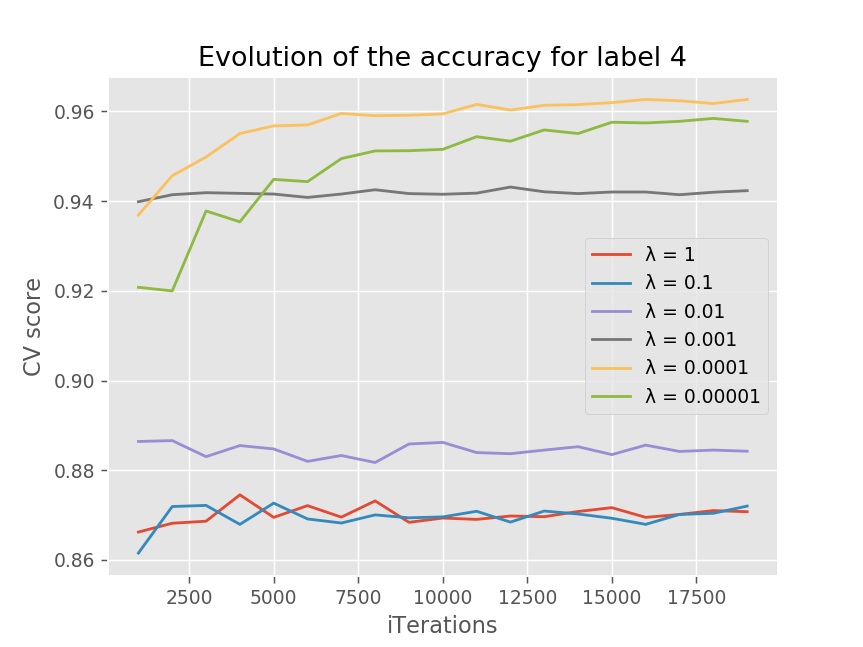

In [18]:
df.sort_values(by = ['T'], inplace = True, ascending = True)
plt.title('Evolution of the accuracy for label 4')
plt.plot(df[df['Lambda'] == 1]['T'], df[df['Lambda'] == 1]['Cross Validation Scores'], label = 'λ = 1')
plt.plot(df[df['Lambda'] == 0.1]['T'], df[df['Lambda'] == 0.1]['Cross Validation Scores'], label = 'λ = 0.1')
plt.plot(df[df['Lambda'] == 0.01]['T'], df[df['Lambda'] == 0.01]['Cross Validation Scores'], label = 'λ = 0.01')
plt.plot(df[df['Lambda'] == 0.001]['T'], df[df['Lambda'] == 0.001]['Cross Validation Scores'], label = 'λ = 0.001')
plt.plot(df[df['Lambda'] == 0.0001]['T'], df[df['Lambda'] == 0.0001]['Cross Validation Scores'], label = 'λ = 0.0001')
plt.plot(df[df['Lambda'] == 0.00001]['T'], df[df['Lambda'] == 0.00001]['Cross Validation Scores'], label = 'λ = 0.00001')
plt.legend()
plt.xlabel('iTerations')
plt.ylabel('CV score')
plt.show()
plt.savefig('label4.png')
plt.savefig('label4.pdf')

In [46]:
X101_train, X101_test, y101_train, y101_test = train_test_split(X, l101, test_size = 0.4, random_state = 42 , stratify = l101)

In [47]:
lambdas = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
scores101 = []
for i in range(1000, 19001, 1000) :
    for k in lambdas :
        svm = SVMPegasos(n_iter = i, lambda1 = k)
        scores101.append(i)
        scores101.append(k)
        svm.fit(X101_train, y101_train)
        trscore101 = svm.score(X101_train, y101_train)
        scores101.append(trscore101)
        tsscore101 = svm.score(X101_test, y101_test)
        scores101.append(tsscore101)
        cvscore101 = np.mean(cross_val_score(svm, X, l101, cv = 10))
        scores101.append(cvscore101)
print(scores101)   

[1000, 1, 0.7909533400469957, 0.7914149043303121, 0.79269889224572, 1000, 0.1, 0.7804632426988922, 0.7769385699899295, 0.79269889224572, 1000, 0.01, 0.7979187646861363, 0.7993454179254783, 0.7963746223564954, 1000, 0.001, 0.9297583081570997, 0.9269889224572004, 0.9264350453172204, 1000, 0.0001, 0.9138972809667674, 0.9057150050352467, 0.9149546827794561, 1000, 1e-05, 0.8856998992950654, 0.8799093655589124, 0.8919939577039276, 2000, 1, 0.7840718361866398, 0.7832326283987915, 0.7848439073514601, 2000, 0.1, 0.7974152400134273, 0.797583081570997, 0.7799093655589123, 2000, 0.01, 0.81310842564619, 0.8118076535750252, 0.7953675730110776, 2000, 0.001, 0.947129909365559, 0.9428499496475328, 0.9335347432024168, 2000, 0.0001, 0.9384021483719369, 0.9274924471299094, 0.9316213494461228, 2000, 1e-05, 0.9034911043974488, 0.895392749244713, 0.9130412890231623, 3000, 1, 0.7964921114467942, 0.7979607250755287, 0.7817220543806646, 3000, 0.1, 0.7842396777442094, 0.7841137965760322, 0.7799093655589124, 3000

In [19]:
scores101 = [1000, 1, 0.7909533400469957, 0.7914149043303121, 0.79269889224572, 1000, 0.1, 0.7804632426988922, 0.7769385699899295, 0.79269889224572, 1000, 0.01, 0.7979187646861363, 0.7993454179254783, 0.7963746223564954, 1000, 0.001, 0.9297583081570997, 0.9269889224572004, 0.9264350453172204, 1000, 0.0001, 0.9138972809667674, 0.9057150050352467, 0.9149546827794561, 1000, 1e-05, 0.8856998992950654, 0.8799093655589124, 0.8919939577039276, 2000, 1, 0.7840718361866398, 0.7832326283987915, 0.7848439073514601, 2000, 0.1, 0.7974152400134273, 0.797583081570997, 0.7799093655589123, 2000, 0.01, 0.81310842564619, 0.8118076535750252, 0.7953675730110776, 2000, 0.001, 0.947129909365559, 0.9428499496475328, 0.9335347432024168, 2000, 0.0001, 0.9384021483719369, 0.9274924471299094, 0.9316213494461228, 2000, 1e-05, 0.9034911043974488, 0.895392749244713, 0.9130412890231623, 3000, 1, 0.7964921114467942, 0.7979607250755287, 0.7817220543806646, 3000, 0.1, 0.7842396777442094, 0.7841137965760322, 0.7799093655589124, 3000, 0.01, 0.7981705270224908, 0.7992195367573011, 0.7886203423967775, 3000, 0.001, 0.9492279288351796, 0.9420946626384693, 0.9377139979859012, 3000, 0.0001, 0.9483887210473313, 0.9359264853977844, 0.9411379657603222, 3000, 1e-05, 0.9273246055723398, 0.9154078549848943, 0.9187814702920442, 4000, 1, 0.7863376972138302, 0.7862537764350453, 0.7833836858006042, 4000, 0.1, 0.7740852635112454, 0.7742950654582075, 0.7841389728096677, 4000, 0.01, 0.7969956361195032, 0.7955689828801611, 0.7861530715005035, 4000, 0.001, 0.9474655924806982, 0.9398288016112789, 0.9376132930513595, 4000, 0.0001, 0.9556059080228264, 0.9486404833836858, 0.9453675730110775, 4000, 1e-05, 0.9399966431688486, 0.927870090634441, 0.9263846928499497, 5000, 1, 0.7663645518630413, 0.7671198388721048, 0.7790030211480363, 5000, 0.1, 0.7656931856327627, 0.7668680765357503, 0.7796576032225578, 5000, 0.01, 0.7797079556898288, 0.7814702920443102, 0.784541792547835, 5000, 0.001, 0.9496475327291037, 0.9431017119838873, 0.9401812688821753, 5000, 0.0001, 0.963578382007385, 0.9488922457200403, 0.947029204431017, 5000, 1e-05, 0.947129909365559, 0.9359264853977844, 0.9328298086606244, 6000, 1, 0.7794561933534743, 0.7809667673716012, 0.7801611278952669, 6000, 0.1, 0.7982544478012756, 0.7982124874118832, 0.7794561933534743, 6000, 0.01, 0.7870090634441088, 0.7890231621349446, 0.7851963746223565, 6000, 0.001, 0.9486404833836858, 0.9410876132930514, 0.940231621349446, 6000, 0.0001, 0.9642497482376636, 0.9486404833836858, 0.9468781470292045, 6000, 1e-05, 0.9499832158442431, 0.93567472306143, 0.9343907351460222, 7000, 1, 0.783987915407855, 0.7861278952668681, 0.7801611278952669, 7000, 0.1, 0.7910372608257804, 0.7920443101711984, 0.7781973816717019, 7000, 0.01, 0.8054716347767708, 0.8056394763343404, 0.7827291037260826, 7000, 0.001, 0.950990265189661, 0.9457452165156093, 0.9413897280966766, 7000, 0.0001, 0.9676905001678415, 0.9517875125881168, 0.9506042296072508, 7000, 1e-05, 0.9527526015441423, 0.9364300100704934, 0.9385699899295066, 8000, 1, 0.7872608257804632, 0.7885196374622356, 0.7805135951661631, 8000, 0.1, 0.7750923128566634, 0.7763091641490433, 0.7796072507552871, 8000, 0.01, 0.7791205102383351, 0.780840886203424, 0.7837865055387715, 8000, 0.001, 0.9509063444108762, 0.9437311178247734, 0.941238670694864, 8000, 0.0001, 0.969452836522323, 0.9553121852970795, 0.9525679758308158, 8000, 1e-05, 0.964081906680094, 0.9404582074521651, 0.9372104733131923, 9000, 1, 0.7786169855656261, 0.7819738167170192, 0.7775427995971802, 9000, 0.1, 0.7690500167841557, 0.7700151057401813, 0.7821752265861027, 9000, 0.01, 0.7841557569654246, 0.7848690835850957, 0.7819234642497482, 9000, 0.001, 0.9504028197381672, 0.9446122860020141, 0.9425981873111782, 9000, 0.0001, 0.9693689157435381, 0.9548086606243706, 0.9532729103726082, 9000, 1e-05, 0.9608929170862706, 0.9407099697885196, 0.9399798590130916, 10000, 1, 0.7794561933534743, 0.779833836858006, 0.7822255790533736, 10000, 0.1, 0.7807150050352467, 0.7832326283987915, 0.7782980866062437, 10000, 0.01, 0.7855824102047667, 0.7854984894259819, 0.7852467270896274, 10000, 0.001, 0.9498153742866734, 0.9400805639476334, 0.9410876132930512, 10000, 0.0001, 0.9716347767707284, 0.956067472306143, 0.9515609264853978, 10000, 1e-05, 0.9655924806982209, 0.9422205438066465, 0.9387713997985901, 11000, 1, 0.7861698556562605, 0.7865055387713998, 0.7829305135951662, 11000, 0.1, 0.7843235985229943, 0.7848690835850957, 0.7810171198388721, 11000, 0.01, 0.7886035582410205, 0.7890231621349446, 0.7863041289023164, 11000, 0.001, 0.9508224236320914, 0.9433534743202417, 0.9415911379657602, 11000, 0.0001, 0.9728935884525008, 0.9546827794561934, 0.9543303121852972, 11000, 1e-05, 0.969452836522323, 0.9476334340382678, 0.9437562940584089, 12000, 1, 0.7867573011077543, 0.7886455186304129, 0.7795568982880161, 12000, 0.1, 0.7814702920443102, 0.7847432024169184, 0.7807653575025176, 12000, 0.01, 0.7947297750923129, 0.7954431017119838, 0.7841389728096677, 12000, 0.001, 0.9528365223229271, 0.9444864048338368, 0.9424471299093655, 12000, 0.0001, 0.973816717019134, 0.956570996978852, 0.9534239677744211, 12000, 1e-05, 0.9710473313192346, 0.9443605236656596, 0.942245720040282, 13000, 1, 0.7819738167170192, 0.7819738167170192, 0.7787512588116817, 13000, 0.1, 0.7773581738838536, 0.7790785498489426, 0.7808660624370594, 13000, 0.01, 0.7895266868076536, 0.7896525679758308, 0.7866062437059416, 13000, 0.001, 0.9531722054380665, 0.9470040281973817, 0.9420443101711984, 13000, 0.0001, 0.9749916079221215, 0.9561933534743202, 0.9537764350453173, 13000, 1e-05, 0.9722222222222222, 0.9437311178247734, 0.945166163141994, 14000, 1, 0.7793722725746894, 0.7824773413897281, 0.7794058408862033, 14000, 0.1, 0.7804632426988922, 0.7813444108761329, 0.7805135951661631, 14000, 0.01, 0.7860859348774757, 0.7862537764350453, 0.7858509566968783, 14000, 0.001, 0.9515777106411547, 0.9432275931520645, 0.9424974823766364, 14000, 0.0001, 0.9729775092312857, 0.9553121852970795, 0.9546324269889226, 14000, 1e-05, 0.9726418261161464, 0.9436052366565961, 0.9466263846928499, 15000, 1, 0.7850788855320577, 0.7856243705941591, 0.7795065458207452, 15000, 0.1, 0.7788687479019806, 0.7807150050352467, 0.7807150050352467, 15000, 0.01, 0.7808828465928164, 0.7812185297079557, 0.786404833836858, 15000, 0.001, 0.9500671366230279, 0.9409617321248741, 0.9418932527693856, 15000, 0.0001, 0.9758308157099698, 0.9575780463242699, 0.9549848942598187, 15000, 1e-05, 0.9749076871433366, 0.9457452165156093, 0.9449144008056395, 16000, 1, 0.7767707284323598, 0.7780715005035247, 0.7796576032225578, 16000, 0.1, 0.7799597180261832, 0.7813444108761329, 0.7822759315206446, 16000, 0.01, 0.7879321920107418, 0.7886455186304129, 0.7856495468277945, 16000, 0.001, 0.9515777106411547, 0.9454934541792548, 0.9414400805639476, 16000, 0.0001, 0.973816717019134, 0.9564451158106747, 0.9561430010070493, 16000, 1e-05, 0.9764182611614636, 0.9500251762336355, 0.9486404833836858, 17000, 1, 0.7926317556226922, 0.7911631419939577, 0.7799597180261832, 17000, 0.1, 0.7851628063108426, 0.7849949647532729, 0.7796576032225578, 17000, 0.01, 0.7819738167170192, 0.7827291037260826, 0.783081570996979, 17000, 0.001, 0.950990265189661, 0.94297583081571, 0.9417925478348439, 17000, 0.0001, 0.9765021819402484, 0.9551863041289023, 0.9547834843907352, 17000, 1e-05, 0.9767539442766029, 0.9517875125881168, 0.9486404833836858, 18000, 1, 0.7771064115474992, 0.7785750251762337, 0.7804128902316213, 18000, 0.1, 0.7861698556562605, 0.7857502517623364, 0.7818227593152065, 18000, 0.01, 0.7833165491775763, 0.7841137965760322, 0.7848439073514603, 18000, 0.001, 0.9513259483048002, 0.9431017119838873, 0.942195367573011, 18000, 0.0001, 0.9750755287009063, 0.9584592145015106, 0.9559919436052366, 18000, 1e-05, 0.9772574689493119, 0.9488922457200403, 0.9482376636455185, 19000, 1, 0.7889392413561598, 0.7883937562940584, 0.7807150050352467, 19000, 0.1, 0.781554212823095, 0.7815961732124874, 0.7813192346424975, 19000, 0.01, 0.7854984894259819, 0.7841137965760322, 0.7843907351460222, 19000, 0.001, 0.9527526015441423, 0.9436052366565961, 0.9409365558912386, 19000, 0.0001, 0.9759986572675394, 0.9545568982880162, 0.955337361530715, 19000, 1e-05, 0.9783484390735147, 0.947129909365559, 0.9481369587109769]

In [20]:
T101 = []
lambda101 = []
trscores101 = []
tsscores101 = []
cvscores101 = []
for i in range(0, len(scores101), 5) :
    T101.append(scores101[i])
for i in range(1, len(scores101), 5) :
    lambda101.append(scores101[i])
for i in range(2, len(scores101), 5) :
    trscores101.append(scores101[i])
for i in range(3, len(scores101), 5) :
    tsscores101.append(scores101[i])
for i in range(4, len(scores101), 5) :
    cvscores101.append(scores101[i])

In [21]:
d = {'T' : T101,
    'Lambda' : lambda101,
     'Training scores' : trscores101,
     'Test scores' : tsscores101,
     'Cross Validation Scores' : cvscores101}
df = pd.DataFrame(d)
df

,T,Lambda,Training scores,Test scores,Cross Validation Scores
0,1000,1.00000,0.790953,0.791415,0.792699
1,1000,0.10000,0.780463,0.776939,0.792699
2,1000,0.01000,0.797919,0.799345,0.796375
3,1000,0.00100,0.929758,0.926989,0.926435
4,1000,0.00010,0.913897,0.905715,0.914955
5,1000,0.00001,0.885700,0.879909,0.891994
6,2000,1.00000,0.784072,0.783233,0.784844
7,2000,0.10000,0.797415,0.797583,0.779909
8,2000,0.01000,0.813108,0.811808,0.795368
9,2000,0.00100,0.947130,0.942850,0.933535


In [22]:
df.sort_values(by = ['Cross Validation Scores'], inplace = True, ascending = False)
df

,T,Lambda,Training scores,Test scores,Cross Validation Scores
94,16000,0.00010,0.973817,0.956445,0.956143
106,18000,0.00010,0.975076,0.958459,0.955992
112,19000,0.00010,0.975999,0.954557,0.955337
88,15000,0.00010,0.975831,0.957578,0.954985
100,17000,0.00010,0.976502,0.955186,0.954783
82,14000,0.00010,0.972978,0.955312,0.954632
64,11000,0.00010,0.972894,0.954683,0.954330
76,13000,0.00010,0.974992,0.956193,0.953776
70,12000,0.00010,0.973817,0.956571,0.953424
52,9000,0.00010,0.969369,0.954809,0.953273


In [23]:
df.describe()

,T,Lambda,Training scores,Test scores,Cross Validation Scores
count,114.000000,114.000000,114.000000,114.000000,114.000000
mean,10000.000000,0.185185,0.870914,0.864025,0.862271
std,5501.407704,0.367754,0.087506,0.079576,0.080232
min,1000.000000,0.000010,0.765693,0.766868,0.777543
25%,5000.000000,0.000100,0.784261,0.784869,0.781848
50%,10000.000000,0.005500,0.849404,0.845859,0.844184
75%,15000.000000,0.100000,0.953088,0.943731,0.942158
max,19000.000000,1.000000,0.978348,0.958459,0.956143


<IPython.core.display.Javascript object>


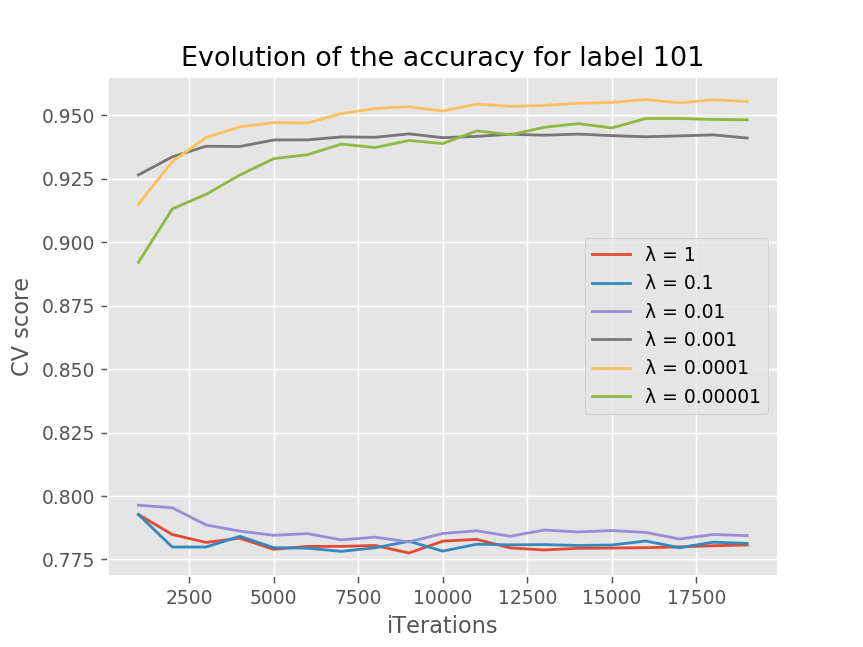

In [24]:
df.sort_values(by = ['T'], inplace = True, ascending = True)
plt.title('Evolution of the accuracy for label 101')
plt.plot(df[df['Lambda'] == 1]['T'], df[df['Lambda'] == 1]['Cross Validation Scores'], label = 'λ = 1')
plt.plot(df[df['Lambda'] == 0.1]['T'], df[df['Lambda'] == 0.1]['Cross Validation Scores'], label = 'λ = 0.1')
plt.plot(df[df['Lambda'] == 0.01]['T'], df[df['Lambda'] == 0.01]['Cross Validation Scores'], label = 'λ = 0.01')
plt.plot(df[df['Lambda'] == 0.001]['T'], df[df['Lambda'] == 0.001]['Cross Validation Scores'], label = 'λ = 0.001')
plt.plot(df[df['Lambda'] == 0.0001]['T'], df[df['Lambda'] == 0.0001]['Cross Validation Scores'], label = 'λ = 0.0001')
plt.plot(df[df['Lambda'] == 0.00001]['T'], df[df['Lambda'] == 0.00001]['Cross Validation Scores'], label = 'λ = 0.00001')
plt.legend()
plt.xlabel('iTerations')
plt.ylabel('CV score')
plt.show()
plt.savefig('label101.png')
plt.savefig('label101.pdf')

In [64]:
X70_train, X70_test, y70_train, y70_test = train_test_split(X, l70, test_size = 0.4, random_state = 42 , stratify = l70)

In [65]:
lambdas = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
scores70 = []
for i in range(1000, 19001, 1000) :
    for k in lambdas :
        svm = SVMPegasos(n_iter = i, lambda1 = k)
        scores70.append(i)
        scores70.append(k)
        svm.fit(X70_train, y70_train)
        trscore70 = svm.score(X70_train, y70_train)
        scores70.append(trscore70)
        tsscore70 = svm.score(X70_test, y70_test)
        scores70.append(tsscore70)
        cvscore70 = np.mean(cross_val_score(svm, X, l70, cv = 10))
        scores70.append(cvscore70)
print(scores70)   

[1000, 1, 0.7768546492111447, 0.7715256797583081, 0.7918429003021148, 1000, 0.1, 0.7895266868076536, 0.7873867069486404, 0.7969284994964754, 1000, 0.01, 0.8366062437059416, 0.8332074521651561, 0.8227593152064451, 1000, 0.001, 0.9445283652232292, 0.9415911379657603, 0.9344914400805641, 1000, 0.0001, 0.9246391406512252, 0.9211983887210473, 0.9263846928499497, 1000, 1e-05, 0.9081906680093992, 0.902190332326284, 0.9033736153071501, 2000, 1, 0.8015273581738839, 0.8016112789526687, 0.783484390735146, 2000, 0.1, 0.7921282309499832, 0.7888972809667674, 0.7867069486404834, 2000, 0.01, 0.8370258475998658, 0.8349697885196374, 0.8175730110775428, 2000, 0.001, 0.9442766028868748, 0.9378147029204431, 0.9381671701913394, 2000, 0.0001, 0.9502349781805975, 0.9365558912386707, 0.9353977844914401, 2000, 1e-05, 0.9339543470963411, 0.9205689828801611, 0.9148036253776436, 3000, 1, 0.8094998321584425, 0.8090382678751259, 0.7916918429003021, 3000, 0.1, 0.7809667673716012, 0.7754279959718026, 0.787462235649546

In [25]:
scores70 = [1000, 1, 0.7768546492111447, 0.7715256797583081, 0.7918429003021148, 1000, 0.1, 0.7895266868076536, 0.7873867069486404, 0.7969284994964754, 1000, 0.01, 0.8366062437059416, 0.8332074521651561, 0.8227593152064451, 1000, 0.001, 0.9445283652232292, 0.9415911379657603, 0.9344914400805641, 1000, 0.0001, 0.9246391406512252, 0.9211983887210473, 0.9263846928499497, 1000, 1e-05, 0.9081906680093992, 0.902190332326284, 0.9033736153071501, 2000, 1, 0.8015273581738839, 0.8016112789526687, 0.783484390735146, 2000, 0.1, 0.7921282309499832, 0.7888972809667674, 0.7867069486404834, 2000, 0.01, 0.8370258475998658, 0.8349697885196374, 0.8175730110775428, 2000, 0.001, 0.9442766028868748, 0.9378147029204431, 0.9381671701913394, 2000, 0.0001, 0.9502349781805975, 0.9365558912386707, 0.9353977844914401, 2000, 1e-05, 0.9339543470963411, 0.9205689828801611, 0.9148036253776436, 3000, 1, 0.8094998321584425, 0.8090382678751259, 0.7916918429003021, 3000, 0.1, 0.7809667673716012, 0.7754279959718026, 0.7874622356495468, 3000, 0.01, 0.823766364551863, 0.8220040281973817, 0.8162638469284994, 3000, 0.001, 0.9521651560926485, 0.9428499496475328, 0.9411883182275931, 3000, 0.0001, 0.952416918429003, 0.9402064451158106, 0.9408358509566968, 3000, 1e-05, 0.9403323262839879, 0.9296324269889225, 0.9269889224572003, 4000, 1, 0.8048841893252769, 0.8021148036253777, 0.7862034239677744, 4000, 0.1, 0.7953172205438066, 0.7936807653575025, 0.7895770392749244, 4000, 0.01, 0.8327458878818396, 0.8324521651560927, 0.8183786505538772, 4000, 0.001, 0.9496475327291037, 0.94297583081571, 0.9430513595166163, 4000, 0.0001, 0.9608929170862706, 0.9465005035246727, 0.9471802618328299, 4000, 1e-05, 0.9469620678079893, 0.9358006042296072, 0.9302114803625378, 5000, 1, 0.8054716347767708, 0.8041289023162135, 0.7870594159113795, 5000, 0.1, 0.7973313192346425, 0.7943101711983888, 0.792195367573011, 5000, 0.01, 0.8280463242698892, 0.8272910372608258, 0.8184290030211481, 5000, 0.001, 0.9507385028533065, 0.942472306143001, 0.9420946626384692, 5000, 0.0001, 0.966515609264854, 0.9493957703927492, 0.9507552870090634, 5000, 1e-05, 0.9518294729775092, 0.9337865055387714, 0.9339879154078549, 6000, 1, 0.8016951997314535, 0.7983383685800605, 0.7872608257804632, 6000, 0.1, 0.8121013763007721, 0.8109264853977844, 0.7885699899295066, 6000, 0.01, 0.8239342061094327, 0.8218781470292045, 0.8192849949647533, 6000, 0.001, 0.9493957703927492, 0.9437311178247734, 0.9428499496475327, 6000, 0.0001, 0.9681940248405505, 0.9488922457200403, 0.9498489425981873, 6000, 1e-05, 0.9539274924471299, 0.932527693856999, 0.9381168177240685, 7000, 1, 0.8049681101040618, 0.8042547834843907, 0.7890735146022154, 7000, 0.1, 0.7884357166834508, 0.7883937562940584, 0.7934541792547835, 7000, 0.01, 0.8288855320577375, 0.82527693856999, 0.815458207452165, 7000, 0.001, 0.9525008392077878, 0.9451158106747231, 0.9439577039274925, 7000, 0.0001, 0.968949311849614, 0.9495216515609265, 0.9508559919436053, 7000, 1e-05, 0.9629070157771064, 0.9422205438066465, 0.936908358509567, 8000, 1, 0.8061430010070494, 0.8056394763343404, 0.7916918429003021, 8000, 0.1, 0.8066465256797583, 0.8047583081570997, 0.7883685800604231, 8000, 0.01, 0.8220040281973817, 0.8188569989929506, 0.8188821752265861, 8000, 0.001, 0.9530043638804968, 0.9446122860020141, 0.9428499496475327, 8000, 0.0001, 0.9712151728768043, 0.9553121852970795, 0.9541792547834843, 8000, 1e-05, 0.9619838872104733, 0.9398288016112789, 0.9413393756294057, 9000, 1, 0.792715676401477, 0.7933031218529708, 0.785448136958711, 9000, 0.1, 0.8016112789526687, 0.800730110775428, 0.7858006042296073, 9000, 0.01, 0.8271231957032561, 0.8271651560926485, 0.8154582074521652, 9000, 0.001, 0.9511581067472307, 0.9443605236656596, 0.9435045317220544, 9000, 0.0001, 0.9716347767707284, 0.9520392749244713, 0.9526183282980867, 9000, 1e-05, 0.9656764014770057, 0.9384441087613293, 0.9420946626384692, 10000, 1, 0.7847432024169184, 0.7820996978851964, 0.7849949647532728, 10000, 0.1, 0.8047163477677073, 0.8041289023162135, 0.7871097683786505, 10000, 0.01, 0.8249412554548506, 0.8236404833836858, 0.8171701913393757, 10000, 0.001, 0.9521651560926485, 0.9441087613293051, 0.9433534743202416, 10000, 0.0001, 0.9750755287009063, 0.9540533736153072, 0.9537764350453173, 10000, 1e-05, 0.9692849949647533, 0.9447381671701913, 0.9425981873111782, 11000, 1, 0.8112621685129238, 0.8115558912386707, 0.7896777442094662, 11000, 0.1, 0.7925478348439073, 0.7919184290030211, 0.7871097683786505, 11000, 0.01, 0.829137294394092, 0.8275427995971802, 0.8185297079556898, 11000, 0.001, 0.9550184625713327, 0.9465005035246727, 0.9420443101711984, 11000, 0.0001, 0.9733971131252098, 0.9536757301107754, 0.9527190332326285, 11000, 1e-05, 0.9725579053373615, 0.9467522658610272, 0.9453675730110775, 12000, 1, 0.7899462907015777, 0.7875125881168177, 0.7900805639476335, 12000, 0.1, 0.797079556898288, 0.7958207452165156, 0.787361530715005, 12000, 0.01, 0.8221718697549514, 0.8208710976837865, 0.8173716012084592, 12000, 0.001, 0.9539274924471299, 0.9458710976837865, 0.9444108761329305, 12000, 0.0001, 0.9739006377979188, 0.9525427995971802, 0.9542799597180263, 12000, 1e-05, 0.9723900637797919, 0.9490181268882175, 0.9435045317220544, 13000, 1, 0.7977509231285667, 0.797583081570997, 0.7903826787512587, 13000, 0.1, 0.8015273581738839, 0.8011077542799597, 0.7891238670694865, 13000, 0.01, 0.8341725411211816, 0.8333333333333334, 0.8212990936555891, 13000, 0.001, 0.9539274924471299, 0.9467522658610272, 0.9433031218529708, 13000, 0.0001, 0.9780966767371602, 0.9553121852970795, 0.9555387713997986, 13000, 1e-05, 0.972809667673716, 0.945619335347432, 0.9455689828801612, 14000, 1, 0.7925478348439073, 0.790281973816717, 0.7886203423967774, 14000, 0.1, 0.8058912386706949, 0.8036253776435045, 0.7891238670694863, 14000, 0.01, 0.8366901644847264, 0.8338368580060423, 0.8210473313192346, 14000, 0.001, 0.9535918093319906, 0.9449899295065458, 0.9437562940584089, 14000, 0.0001, 0.9773413897280967, 0.9544310171198389, 0.9541792547834843, 14000, 1e-05, 0.9745720040281974, 0.9485146022155085, 0.9454179254783485, 15000, 1, 0.7941423296408191, 0.7912890231621349, 0.7882175226586103, 15000, 0.1, 0.7996811010406176, 0.7974572004028198, 0.7910372608257805, 15000, 0.01, 0.8269553541456864, 0.8248992950654582, 0.8170694864048338, 15000, 0.001, 0.9555219872440416, 0.947129909365559, 0.9443101711983888, 15000, 0.0001, 0.9788519637462235, 0.9550604229607251, 0.9545820745216517, 15000, 1e-05, 0.9765021819402484, 0.947129909365559, 0.9449647532729104, 16000, 1, 0.7990936555891238, 0.7979607250755287, 0.7876132930513594, 16000, 0.1, 0.8000167841557569, 0.7988418932527693, 0.7903323262839879, 16000, 0.01, 0.8433199060087277, 0.8383685800604229, 0.8208459214501509, 16000, 0.001, 0.952920443101712, 0.9448640483383686, 0.943705941591138, 16000, 0.0001, 0.9770896273917422, 0.9531722054380665, 0.9561430010070493, 16000, 1e-05, 0.9775931520644512, 0.9491440080563948, 0.9482376636455188, 17000, 1, 0.7994293387042631, 0.79972306143001, 0.7905337361530715, 17000, 0.1, 0.7947297750923129, 0.7927995971802618, 0.7890231621349446, 17000, 0.01, 0.8277106411547499, 0.826913393756294, 0.8174723061430009, 17000, 0.001, 0.9539274924471299, 0.945619335347432, 0.943655589123867, 17000, 0.0001, 0.9784323598522995, 0.9561933534743202, 0.9567472306143001, 17000, 1e-05, 0.9797750923128566, 0.9495216515609265, 0.9486908358509567, 18000, 1, 0.7924639140651225, 0.7914149043303121, 0.7861027190332326, 18000, 0.1, 0.7984222893588453, 0.796576032225579, 0.7893252769385699, 18000, 0.01, 0.8329137294394092, 0.8300604229607251, 0.818932527693857, 18000, 0.001, 0.9551023833501174, 0.9468781470292045, 0.9445619335347433, 18000, 0.0001, 0.9772574689493119, 0.9551863041289023, 0.9561430010070495, 18000, 1e-05, 0.9821248741188319, 0.9493957703927492, 0.9479859013091643, 19000, 1, 0.802450486740517, 0.8019889224572004, 0.7915407854984895, 19000, 0.1, 0.8059751594494797, 0.8048841893252769, 0.7872104733131924, 19000, 0.01, 0.828633769721383, 0.8280463242698892, 0.8202920443101712, 19000, 0.001, 0.9533400469956361, 0.945619335347432, 0.9435045317220544, 19000, 0.0001, 0.9790198053037932, 0.9566968781470292, 0.9560422960725076, 19000, 1e-05, 0.9832158442430345, 0.9501510574018127, 0.9498489425981873]

In [26]:
T70 = []
lambda70 = []
trscores70 = []
tsscores70 = []
cvscores70 = []
for i in range(0, len(scores70), 5) :
    T70.append(scores70[i])
for i in range(1, len(scores70), 5) :
    lambda70.append(scores70[i])
for i in range(2, len(scores70), 5) :
    trscores70.append(scores70[i])
for i in range(3, len(scores70), 5) :
    tsscores70.append(scores70[i])
for i in range(4, len(scores70), 5) :
    cvscores70.append(scores70[i])

In [27]:
d = {'T' : T70,
    'Lambda' : lambda70,
     'Training scores' : trscores70,
     'Test scores' : tsscores70,
     'Cross Validation Scores' : cvscores70}
df = pd.DataFrame(d)
df

,T,Lambda,Training scores,Test scores,Cross Validation Scores
0,1000,1.00000,0.776855,0.771526,0.791843
1,1000,0.10000,0.789527,0.787387,0.796928
2,1000,0.01000,0.836606,0.833207,0.822759
3,1000,0.00100,0.944528,0.941591,0.934491
4,1000,0.00010,0.924639,0.921198,0.926385
5,1000,0.00001,0.908191,0.902190,0.903374
6,2000,1.00000,0.801527,0.801611,0.783484
7,2000,0.10000,0.792128,0.788897,0.786707
8,2000,0.01000,0.837026,0.834970,0.817573
9,2000,0.00100,0.944277,0.937815,0.938167


In [28]:
df.sort_values(by = ['Cross Validation Scores'], inplace = True, ascending = False)
df

,T,Lambda,Training scores,Test scores,Cross Validation Scores
100,17000,0.00010,0.978432,0.956193,0.956747
106,18000,0.00010,0.977257,0.955186,0.956143
94,16000,0.00010,0.977090,0.953172,0.956143
112,19000,0.00010,0.979020,0.956697,0.956042
76,13000,0.00010,0.978097,0.955312,0.955539
88,15000,0.00010,0.978852,0.955060,0.954582
70,12000,0.00010,0.973901,0.952543,0.954280
82,14000,0.00010,0.977341,0.954431,0.954179
46,8000,0.00010,0.971215,0.955312,0.954179
58,10000,0.00010,0.975076,0.954053,0.953776


In [29]:
df.describe()

,T,Lambda,Training scores,Test scores,Cross Validation Scores
count,114.000000,114.000000,114.000000,114.000000,114.000000
mean,10000.000000,0.185185,0.884874,0.875864,0.871288
std,5501.407704,0.367754,0.078091,0.070414,0.073854
min,1000.000000,0.000010,0.776855,0.771526,0.783484
25%,5000.000000,0.000100,0.804905,0.803751,0.790420
50%,10000.000000,0.005500,0.875755,0.870279,0.863066
75%,15000.000000,0.100000,0.959550,0.945808,0.943744
max,19000.000000,1.000000,0.983216,0.956697,0.956747


<IPython.core.display.Javascript object>


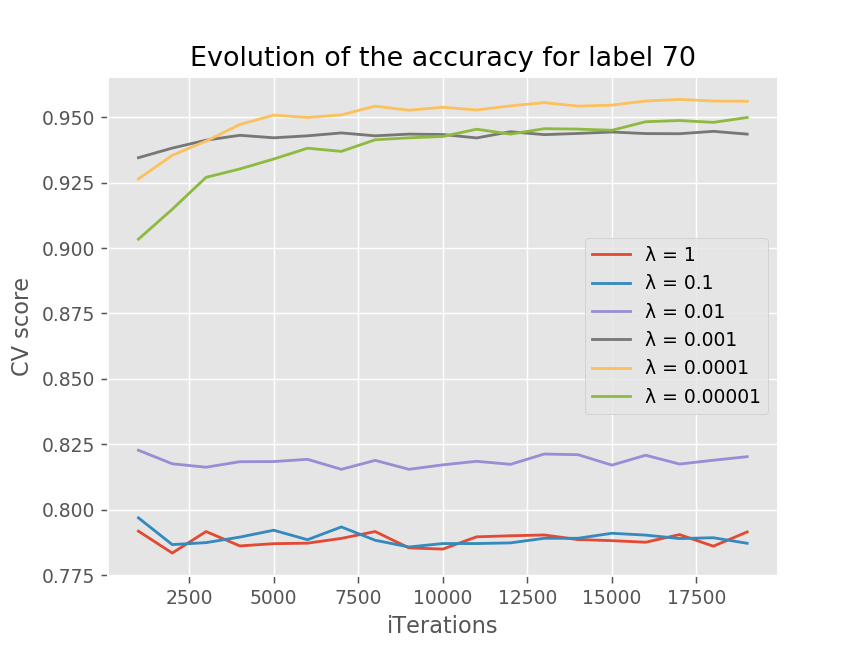

In [30]:
df.sort_values(by = ['T'], inplace = True, ascending = True)
plt.title('Evolution of the accuracy for label 70')
plt.plot(df[df['Lambda'] == 1]['T'], df[df['Lambda'] == 1]['Cross Validation Scores'], label = 'λ = 1')
plt.plot(df[df['Lambda'] == 0.1]['T'], df[df['Lambda'] == 0.1]['Cross Validation Scores'], label = 'λ = 0.1')
plt.plot(df[df['Lambda'] == 0.01]['T'], df[df['Lambda'] == 0.01]['Cross Validation Scores'], label = 'λ = 0.01')
plt.plot(df[df['Lambda'] == 0.001]['T'], df[df['Lambda'] == 0.001]['Cross Validation Scores'], label = 'λ = 0.001')
plt.plot(df[df['Lambda'] == 0.0001]['T'], df[df['Lambda'] == 0.0001]['Cross Validation Scores'], label = 'λ = 0.0001')
plt.plot(df[df['Lambda'] == 0.00001]['T'], df[df['Lambda'] == 0.00001]['Cross Validation Scores'], label = 'λ = 0.00001')
plt.legend()
plt.xlabel('iTerations')
plt.ylabel('CV score')
plt.show()
plt.savefig('label70.png')
plt.savefig('label70.pdf')

In [71]:
X33_train, X33_test, y33_train, y33_test = train_test_split(X, l33, test_size = 0.4, random_state = 42 , stratify = l33)

In [72]:
lambdas = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
scores33 = []
for i in range(1000, 19001, 1000) :
    for k in lambdas :
        svm = SVMPegasos(n_iter = i, lambda1 = k)
        scores33.append(i)
        scores33.append(k)
        svm.fit(X33_train, y33_train)
        trscore33 = svm.score(X33_train, y33_train)
        scores33.append(trscore33)
        tsscore33 = svm.score(X33_test, y33_test)
        scores33.append(tsscore33)
        cvscore33 = np.mean(cross_val_score(svm, X, l33, cv = 10))
        scores33.append(cvscore33)
print(scores33)   

[1000, 1, 0.8272910372608258, 0.8111782477341389, 0.7923464249748238, 1000, 0.1, 0.8372776099362202, 0.8267875125881168, 0.7996475327291037, 1000, 0.01, 0.8275427995971802, 0.8173464249748238, 0.8047331319234642, 1000, 0.001, 0.8942598187311178, 0.8766364551863042, 0.8864551863041289, 1000, 0.0001, 0.8557401812688822, 0.848313192346425, 0.8614803625377643, 1000, 1e-05, 0.8557401812688822, 0.8449144008056395, 0.8331319234642496, 2000, 1, 0.7988418932527693, 0.7837361530715005, 0.8149043303121853, 2000, 0.1, 0.8528029540114133, 0.8430261832829808, 0.8165156092648539, 2000, 0.01, 0.8606075864384022, 0.847809667673716, 0.8040785498489426, 2000, 0.001, 0.9119671030547164, 0.8970292044310171, 0.8915911379657603, 2000, 0.0001, 0.9030715005035247, 0.8844410876132931, 0.8783484390735147, 2000, 1e-05, 0.8704263175562269, 0.848816717019134, 0.8551359516616314, 3000, 1, 0.807737495803961, 0.7978348439073515, 0.8065961732124874, 3000, 0.1, 0.8199899295065458, 0.8052618328298087, 0.8053877139979859,

In [31]:
scores33 = [1000, 1, 0.8272910372608258, 0.8111782477341389, 0.7923464249748238, 1000, 0.1, 0.8372776099362202, 0.8267875125881168, 0.7996475327291037, 1000, 0.01, 0.8275427995971802, 0.8173464249748238, 0.8047331319234642, 1000, 0.001, 0.8942598187311178, 0.8766364551863042, 0.8864551863041289, 1000, 0.0001, 0.8557401812688822, 0.848313192346425, 0.8614803625377643, 1000, 1e-05, 0.8557401812688822, 0.8449144008056395, 0.8331319234642496, 2000, 1, 0.7988418932527693, 0.7837361530715005, 0.8149043303121853, 2000, 0.1, 0.8528029540114133, 0.8430261832829808, 0.8165156092648539, 2000, 0.01, 0.8606075864384022, 0.847809667673716, 0.8040785498489426, 2000, 0.001, 0.9119671030547164, 0.8970292044310171, 0.8915911379657603, 2000, 0.0001, 0.9030715005035247, 0.8844410876132931, 0.8783484390735147, 2000, 1e-05, 0.8704263175562269, 0.848816717019134, 0.8551359516616314, 3000, 1, 0.807737495803961, 0.7978348439073515, 0.8065961732124874, 3000, 0.1, 0.8199899295065458, 0.8052618328298087, 0.8053877139979859, 3000, 0.01, 0.8064786841221887, 0.7906596173212488, 0.7913393756294058, 3000, 0.001, 0.9160792212151728, 0.9031973816717019, 0.8941087613293052, 3000, 0.0001, 0.916498825109097, 0.8909869083585096, 0.8945619335347434, 3000, 1e-05, 0.8910708291372944, 0.86769889224572, 0.8676233635448136, 4000, 1, 0.8144511581067473, 0.79972306143001, 0.8057401812688821, 4000, 0.1, 0.8192346424974823, 0.8045065458207452, 0.7973313192346424, 4000, 0.01, 0.8318227593152064, 0.8182275931520645, 0.801510574018127, 4000, 0.001, 0.9131419939577039, 0.8950151057401813, 0.9000503524672709, 4000, 0.0001, 0.9297583081570997, 0.895896273917422, 0.9004028197381672, 4000, 1e-05, 0.9047499160792212, 0.8727341389728097, 0.8739677744209466, 5000, 1, 0.8280463242698892, 0.8183534743202417, 0.8057401812688821, 5000, 0.1, 0.8108425646189996, 0.7972054380664653, 0.8046324269889225, 5000, 0.01, 0.8229271567640147, 0.8092900302114804, 0.807754279959718, 5000, 0.001, 0.9206948640483383, 0.899043303121853, 0.8974823766364552, 5000, 0.0001, 0.9350453172205438, 0.9038267875125882, 0.9040785498489425, 5000, 1e-05, 0.9070996978851964, 0.8671953675730111, 0.8793554884189325, 6000, 1, 0.814115474991608, 0.7998489425981873, 0.8124370594159114, 6000, 0.1, 0.8323262839879154, 0.8173464249748238, 0.8135448136958712, 6000, 0.01, 0.8222557905337362, 0.8065206445115811, 0.8055891238670695, 6000, 0.001, 0.9177576367908694, 0.9014350453172205, 0.9004531722054381, 6000, 0.0001, 0.9420107418596845, 0.9081067472306144, 0.9087613293051359, 6000, 1e-05, 0.9190164484726419, 0.878147029204431, 0.8829305135951662, 7000, 1, 0.8128566633098355, 0.7984642497482377, 0.8089627391742196, 7000, 0.1, 0.8321584424303458, 0.8152064451158106, 0.8115307150050353, 7000, 0.01, 0.8293051359516617, 0.8162134944612286, 0.8079053373615308, 7000, 0.001, 0.9251426653239342, 0.9077291037260826, 0.9013595166163142, 7000, 0.0001, 0.9446122860020141, 0.9099949647532729, 0.9107250755287009, 7000, 1e-05, 0.9197717354817053, 0.8790281973816717, 0.8879154078549849, 8000, 1, 0.8200738502853306, 0.80337361530715, 0.8031218529707956, 8000, 0.1, 0.8166330983551527, 0.801233635448137, 0.8078549848942599, 8000, 0.01, 0.8302282645182947, 0.8153323262839879, 0.8109264853977844, 8000, 0.001, 0.9183450822423632, 0.9028197381671702, 0.8984894259818732, 8000, 0.0001, 0.946122860020141, 0.9112537764350453, 0.9132426988922457, 8000, 1e-05, 0.9356327626720375, 0.8923716012084593, 0.887865055387714, 9000, 1, 0.8162134944612286, 0.8016112789526687, 0.8054380664652567, 9000, 0.1, 0.8005203088284659, 0.7857502517623364, 0.8084592145015105, 9000, 0.01, 0.8039610607586438, 0.7888972809667674, 0.8066465256797584, 9000, 0.001, 0.9202752601544142, 0.9034491440080564, 0.9016616314199396, 9000, 0.0001, 0.9521651560926485, 0.9120090634441088, 0.9138469284994963, 9000, 1e-05, 0.9358006042296072, 0.8878398791540786, 0.8912890231621351, 10000, 1, 0.813611950318899, 0.7960725075528701, 0.8059415911379657, 10000, 0.1, 0.8084927828130245, 0.7933031218529708, 0.8081570996978853, 10000, 0.01, 0.8313192346424975, 0.8145770392749244, 0.8068982880161129, 10000, 0.001, 0.9210305471634777, 0.9045820745216515, 0.9017623363544816, 10000, 0.0001, 0.9510741859684458, 0.9159113796576033, 0.9134441087613292, 10000, 1e-05, 0.9428499496475328, 0.8961480362537765, 0.8931520644511581, 11000, 1, 0.8094998321584425, 0.7954431017119838, 0.8120342396777442, 11000, 0.1, 0.8178079892581404, 0.8024924471299094, 0.8054884189325277, 11000, 0.01, 0.8186471970459885, 0.80337361530715, 0.8097180261832829, 11000, 0.001, 0.918932527693857, 0.9015609264853978, 0.9025176233635449, 11000, 0.0001, 0.9528365223229271, 0.9159113796576033, 0.9180261832829808, 11000, 1e-05, 0.940751930177912, 0.8941339375629406, 0.8965256797583082, 12000, 1, 0.8307317891910037, 0.8157099697885196, 0.8044813695871099, 12000, 0.1, 0.82527693856999, 0.8126888217522659, 0.8100201409869084, 12000, 0.01, 0.8165491775763679, 0.8024924471299094, 0.809667673716012, 12000, 0.001, 0.9200234978180597, 0.9013091641490433, 0.900604229607251, 12000, 0.0001, 0.9568647197045989, 0.9156596173212488, 0.9172708962739173, 12000, 1e-05, 0.9488922457200403, 0.8967774420946626, 0.8992447129909366, 13000, 1, 0.8319066800939913, 0.8173464249748238, 0.8081570996978853, 13000, 0.1, 0.8105908022826451, 0.7927995971802618, 0.8038267875125881, 13000, 0.01, 0.828633769721383, 0.8148288016112789, 0.8066968781470292, 13000, 0.001, 0.9201074185968445, 0.9047079556898288, 0.901460221550856, 13000, 0.0001, 0.9568647197045989, 0.9140231621349446, 0.9213997985901308, 13000, 1e-05, 0.9513259483048002, 0.8979103726082578, 0.9051863041289023, 14000, 1, 0.8277945619335347, 0.8136958710976838, 0.8064954682779456, 14000, 0.1, 0.8161295736824438, 0.8001007049345418, 0.8112286002014099, 14000, 0.01, 0.8229271567640147, 0.8068982880161127, 0.8083081570996977, 14000, 0.001, 0.9124706277274253, 0.8971550855991943, 0.901963746223565, 14000, 0.0001, 0.9565290365894595, 0.9185548841893253, 0.9201913393756295, 14000, 1e-05, 0.9537596508895603, 0.9024420946626385, 0.9011077542799597, 15000, 1, 0.8235985229942934, 0.8105488418932527, 0.8078549848942599, 15000, 0.1, 0.8287176905001679, 0.8147029204431017, 0.8079556898288016, 15000, 0.01, 0.8320745216515609, 0.8201158106747231, 0.8095166163141995, 15000, 0.001, 0.9180093991272239, 0.9015609264853978, 0.9007552870090635, 15000, 0.0001, 0.9595501846257133, 0.9172960725075529, 0.9202416918429004, 15000, 1e-05, 0.957787848271232, 0.9008056394763343, 0.9017119838872105, 16000, 1, 0.8209130580731789, 0.8065206445115811, 0.8075025176233636, 16000, 0.1, 0.8196542463914065, 0.8042547834843907, 0.8085599194360524, 16000, 0.01, 0.8159617321248741, 0.801737160120846, 0.8089123867069485, 16000, 0.001, 0.9237160120845922, 0.9038267875125882, 0.9017119838872105, 16000, 0.0001, 0.9591305807317891, 0.9177995971802618, 0.9214501510574019, 16000, 1e-05, 0.9591305807317891, 0.8992950654582075, 0.9032729103726084, 17000, 1, 0.8292212151728768, 0.8141993957703928, 0.8080060422960725, 17000, 0.1, 0.8204934541792548, 0.8065206445115811, 0.8110775427995971, 17000, 0.01, 0.8165491775763679, 0.8001007049345418, 0.807754279959718, 17000, 0.001, 0.9191842900302115, 0.9018126888217523, 0.9030211480362539, 17000, 0.0001, 0.9598858677408526, 0.9162890231621349, 0.9207452165156094, 17000, 1e-05, 0.9609768378650554, 0.9074773413897281, 0.9026183282980866, 18000, 1, 0.8220879489761665, 0.8063947633434039, 0.8092145015105741, 18000, 0.1, 0.8192346424974823, 0.8052618328298087, 0.8085095669687814, 18000, 0.01, 0.8051359516616314, 0.7892749244712991, 0.8076032225579054, 18000, 0.001, 0.9185129237999329, 0.9038267875125882, 0.9025679758308158, 18000, 0.0001, 0.9612286002014099, 0.9201913393756294, 0.9192849949647532, 18000, 1e-05, 0.9633266196710305, 0.8989174219536757, 0.9041792547834845, 19000, 1, 0.8194864048338368, 0.8042547834843907, 0.8100704934541794, 19000, 0.1, 0.8261161463578383, 0.8131923464249748, 0.8094662638469284, 19000, 0.01, 0.831570996978852, 0.8155840886203424, 0.8115307150050353, 19000, 0.001, 0.9198556562604902, 0.901686807653575, 0.9025679758308158, 19000, 0.0001, 0.9609768378650554, 0.9210725075528701, 0.9221047331319234, 19000, 1e-05, 0.9658442430345754, 0.9040785498489426, 0.9084088620342398]

In [32]:
T33 = []
lambda33 = []
trscores33 = []
tsscores33 = []
cvscores33 = []
for i in range(0, len(scores33), 5) :
    T33.append(scores33[i])
for i in range(1, len(scores33), 5) :
    lambda33.append(scores33[i])
for i in range(2, len(scores33), 5) :
    trscores33.append(scores33[i])
for i in range(3, len(scores33), 5) :
    tsscores33.append(scores33[i])
for i in range(4, len(scores33), 5) :
    cvscores33.append(scores33[i])

In [33]:
d = {'T' : T33,
    'Lambda' : lambda33,
     'Training scores' : trscores33,
     'Test scores' : tsscores33,
     'Cross Validation Scores' : cvscores33}
df = pd.DataFrame(d)
df

,T,Lambda,Training scores,Test scores,Cross Validation Scores
0,1000,1.00000,0.827291,0.811178,0.792346
1,1000,0.10000,0.837278,0.826788,0.799648
2,1000,0.01000,0.827543,0.817346,0.804733
3,1000,0.00100,0.894260,0.876636,0.886455
4,1000,0.00010,0.855740,0.848313,0.861480
5,1000,0.00001,0.855740,0.844914,0.833132
6,2000,1.00000,0.798842,0.783736,0.814904
7,2000,0.10000,0.852803,0.843026,0.816516
8,2000,0.01000,0.860608,0.847810,0.804079
9,2000,0.00100,0.911967,0.897029,0.891591


In [34]:
df.sort_values(by = ['Cross Validation Scores'], inplace = True, ascending = False)
df

,T,Lambda,Training scores,Test scores,Cross Validation Scores
112,19000,0.00010,0.960977,0.921073,0.922105
94,16000,0.00010,0.959131,0.917800,0.921450
76,13000,0.00010,0.956865,0.914023,0.921400
100,17000,0.00010,0.959886,0.916289,0.920745
88,15000,0.00010,0.959550,0.917296,0.920242
82,14000,0.00010,0.956529,0.918555,0.920191
106,18000,0.00010,0.961229,0.920191,0.919285
64,11000,0.00010,0.952837,0.915911,0.918026
70,12000,0.00010,0.956865,0.915660,0.917271
52,9000,0.00010,0.952165,0.912009,0.913847


In [35]:
df.describe()

,T,Lambda,Training scores,Test scores,Cross Validation Scores
count,114.000000,114.000000,114.000000,114.000000,114.000000
mean,10000.000000,0.185185,0.875883,0.852613,0.853124
std,5501.407704,0.367754,0.057939,0.047881,0.047741
min,1000.000000,0.000010,0.798842,0.783736,0.791339
25%,5000.000000,0.000100,0.820598,0.806426,0.807868
50%,10000.000000,0.005500,0.855740,0.846362,0.824824
75%,15000.000000,0.100000,0.924786,0.901561,0.901611
max,19000.000000,1.000000,0.965844,0.921073,0.922105


<IPython.core.display.Javascript object>


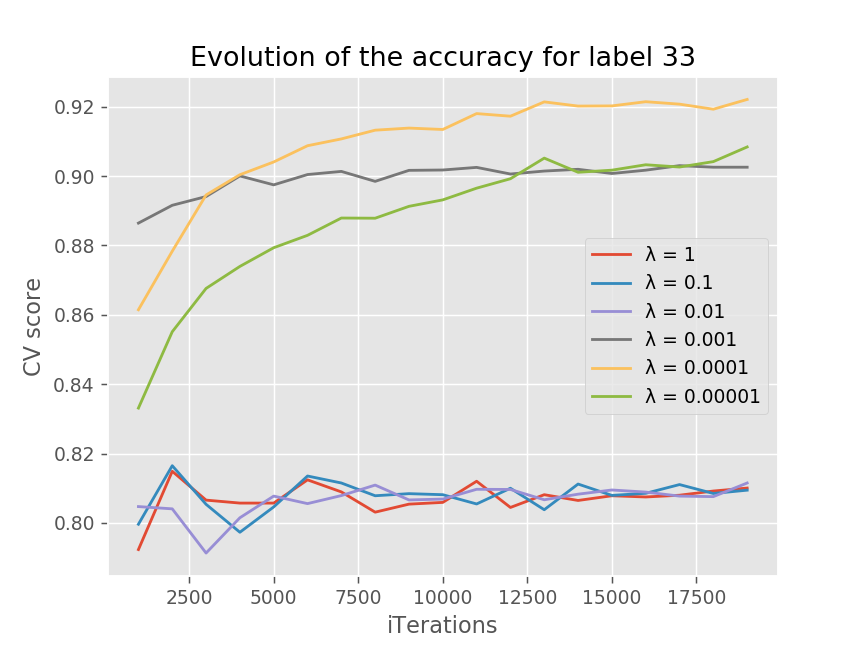

In [36]:
df.sort_values(by = ['T'], inplace = True, ascending = True)
plt.title('Evolution of the accuracy for label 33')
plt.plot(df[df['Lambda'] == 1]['T'], df[df['Lambda'] == 1]['Cross Validation Scores'], label = 'λ = 1')
plt.plot(df[df['Lambda'] == 0.1]['T'], df[df['Lambda'] == 0.1]['Cross Validation Scores'], label = 'λ = 0.1')
plt.plot(df[df['Lambda'] == 0.01]['T'], df[df['Lambda'] == 0.01]['Cross Validation Scores'], label = 'λ = 0.01')
plt.plot(df[df['Lambda'] == 0.001]['T'], df[df['Lambda'] == 0.001]['Cross Validation Scores'], label = 'λ = 0.001')
plt.plot(df[df['Lambda'] == 0.0001]['T'], df[df['Lambda'] == 0.0001]['Cross Validation Scores'], label = 'λ = 0.0001')
plt.plot(df[df['Lambda'] == 0.00001]['T'], df[df['Lambda'] == 0.00001]['Cross Validation Scores'], label = 'λ = 0.00001')
plt.legend()
plt.xlabel('iTerations')
plt.ylabel('CV score')
plt.show()
plt.savefig('label33.png')
plt.savefig('label33.pdf')